## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [2]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions= pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


**Q1** Are each of these data sets Tidy?

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

1. yes
2. no, 8, 10, 9
3. name, birth_year, death_year, profession, known_for
4. name

## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [9]:
# Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

it makes only 7 rows, discluding ada and marie

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [10]:
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_scientists
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Rosalind Franklin,NaN,NaN,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [11]:
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right',indicator=True)
mask = DF_scientists['_merge']=='both'
DF_scientists=DF_scientists[mask]
DF_scientists

,name,profession,known_for,birth_year,death_year,_merge
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0,both
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0,both
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0,both
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0,both
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN,both
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN,both
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN,both


## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [12]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
DF_prices

Loading ITables v2.5.2 from the internet... (need help?)


,item,price
0,avocado,0.50
1,banana,0.15
2,bread,1.00
3,milk,0.80
4,toilet paper,3.00


## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [13]:
# define DF_combined

In [8]:
DF_combined['price'].sum()

In [9]:
#

In [10]:
#

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [14]:
DF_combined = pd.merge(DF_prices,DF_purchases,on='item',how='right')
DF_combined['price'].sum()

np.float64(5.75)

# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [17]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [18]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [20]:
# 21
DF_raw.shape

(173, 21)

In [21]:
# 173

This data set has 173 observations and 21 variables.

In [22]:
# both

In [23]:
# ShareWomen, P25th, P75th

rows=observations, columns=variables

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [24]:
DF_raw.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [32]:
# Which major has the lowest unemployment rate? Show a data frame that answers this question, 
# but only show columns that are useful to the answer.
my_columns = ['Unemployment_rate','Major']
DF_raw[my_columns].sort_values('Unemployment_rate')

mask = DF_raw['Unemployment_rate'] >0
DF_new = DF_raw[mask]
display(DF_new[my_columns].sort_values('Unemployment_rate'))




my_columns = ['ShareWomen','Major']
DF_raw[my_columns].sort_values('ShareWomen')

mask = DF_raw['ShareWomen'] >0
DF_new = DF_raw[mask]
display(DF_new[my_columns].sort_values('ShareWomen'))

,Unemployment_rate,Major
14,0.006334,ENGINEERING MECHANICS PHYSICS AND SCIENCE
19,0.011690,COURT REPORTING
119,0.016203,MATHEMATICS TEACHER EDUCATION
0,0.018381,PETROLEUM ENGINEERING
64,0.019642,GENERAL AGRICULTURE
...,...,...
29,0.128426,PUBLIC POLICY
170,0.149048,CLINICAL PSYCHOLOGY
84,0.151850,COMPUTER NETWORKING AND TELECOMMUNICATIONS
89,0.159491,PUBLIC ADMINISTRATION


,ShareWomen,Major
66,0.077453,MECHANICAL ENGINEERING RELATED TECHNOLOGIES
26,0.090713,CONSTRUCTION SERVICES
1,0.101852,MINING AND MINERAL ENGINEERING
3,0.107313,NAVAL ARCHITECTURE AND MARINE ENGINEERING
8,0.119559,MECHANICAL ENGINEERING
...,...,...
150,0.910933,FAMILY AND CONSUMER SCIENCES
138,0.923745,ELEMENTARY EDUCATION
51,0.927807,MEDICAL ASSISTING SERVICES
163,0.967998,COMMUNICATION DISORDERS SCIENCES AND SERVICES


In [34]:
# Do some summary statistics using the .group_by() 
# command to see the statistics for each major category.
some_cols = ['Median','Major_category']
DF_raw[some_cols].groupby('Major_category').describe()
# Agriculture & Natural Resources is the most represented
# Social Science is the least represented

Median                              \
                                     count          mean           std   
Major_category                                                           
Agriculture & Natural Resources       10.0  36900.000000   6935.416354   
Arts                                   8.0  33062.500000   7223.164621   
Biology & Life Science                14.0  36421.428571   4528.912006   
Business                              13.0  43538.461538   7774.052832   
Communications & Journalism            4.0  34500.000000   1000.000000   
Computers & Mathematics               11.0  42745.454545   5108.691346   
Education                             16.0  32350.000000   3892.728263   
Engineering                           29.0  57382.758621  13626.079747   
Health                                12.0  36825.000000   5776.460854   
Humanities & Liberal Arts             15.0  31913.333333   3393.032076   
Industrial Arts & Consumer Services    7.0  36342.857143   7290.829204   
Interdisciplinary                      1.0  35000.000000           NaN   
Law & Public Policy                    5.0  42200.000000   9066.421565   
Physical Sciences                     10.0  41890.000000   8251.659766   
Psychology & Social Work               9.0  30100.000000   5381.914158   
Social Science                         9.0  37344.444444   4750.555523   

                                                                         \
                                         min      25%      50%      75%   
Major_category                                                            
Agriculture & Natural Resources      29000.0  32750.0  35000.0  40000.0   
Arts                                 27000.0  29750.0  30750.0  32750.0   
Biology & Life Science               26000.0  33875.0  36300.0  39500.0   
Business                             33000.0  38000.0  40000.0  47000.0   
Communications & Journalism          33000.0  34500.0  35000.0  35000.0   
Computers & Mathematics              35000.0  39400.0  45000.0  45000.0   
Education                            22000.0  31750.0  32750.0  34000.0   
Engineering                          40000.0  50000.0  57000.0  60000.0   
Health                               28000.0  33375.0  35000.0  40500.0   
Humanities & Liberal Arts            27000.0  29500.0  32000.0  34000.0   
Industrial Arts & Consumer Services  29000.0  31000.0  35000.0  39200.0   
Interdisciplinary                    35000.0  35000.0  35000.0  35000.0   
Law & Public Policy                  35000.0  36000.0  36000.0  50000.0   
Physical Sciences                    35000.0  36050.0  39500.0  44925.0   
Psychology & Social Work             23400.0  25000.0  30000.0  31500.0   
Social Science                       32000.0  33000.0  38000.0  40000.0   

                                               
                                          max  
Major_category                                 
Agriculture & Natural Resources       53000.0  
Arts                                  50000.0  
Biology & Life Science                45000.0  
Business                              62000.0  
Communications & Journalism           35000.0  
Computers & Mathematics               53000.0  
Education                             41000.0  
Engineering                          110000.0  
Health                                48000.0  
Humanities & Liberal Arts             40000.0  
Industrial Arts & Consumer Services   50000.0  
Interdisciplinary                     35000.0  
Law & Public Policy                   54000.0  
Physical Sciences                     62000.0  
Psychology & Social Work              40000.0  
Social Science                        47000.0

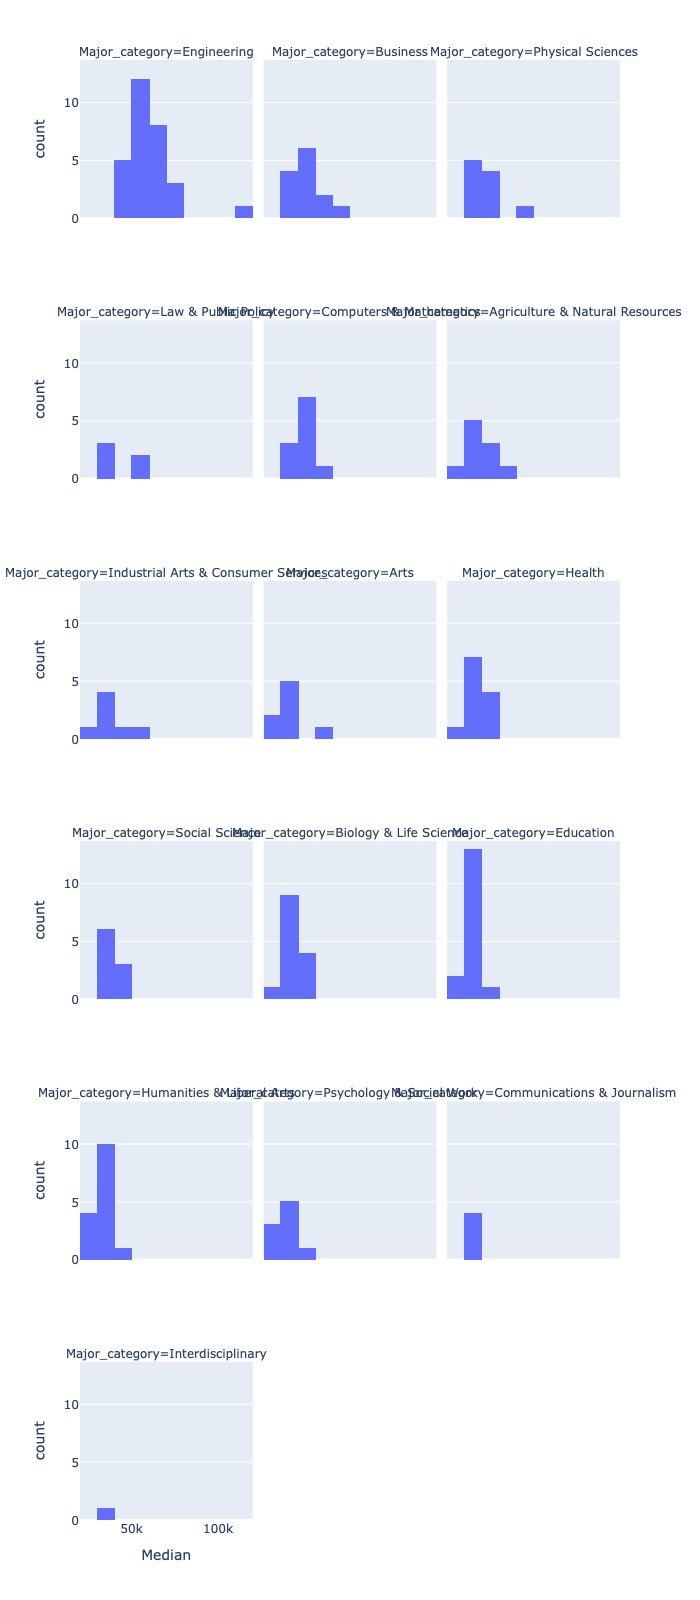

In [37]:
# Make a histogram that explores median income for each of the major categories (facet_col).
# How did you choose your number of bins?

fig = px.histogram(DF_raw,
                  x = 'Median',
                   nbins = 16,
                  facet_col='Major_category',
                  facet_col_wrap=3)

fig.update_layout(autosize=False,
                  width=800,
                  height=1600)

fig.show()

# i chose 16bins because there were 16 rows in the data set above
# facet_col_wrap is 3 so it doesn't go off the page

In [48]:
# Answer the question: Which major category has the highest typical 
# (you'll need to decide what this means) median income?

my_columns = ['Major_category','Median','Total']
DF_raw[my_columns].groupby('Major_category').mean().sort_values('Median', ascending=False)

,Median,Total
Major_category,,
Engineering,57382.758621,18537.344828
Business,43538.461538,100182.769231
Computers & Mathematics,42745.454545,27182.545455
Law & Public Policy,42200.000000,35821.400000
Physical Sciences,41890.000000,18547.900000
Social Science,37344.444444,58885.111111
Agriculture & Natural Resources,36900.000000,8402.222222
Health,36825.000000,38602.500000
Biology & Life Science,36421.428571,32418.714286


In [49]:
#

i chose the mean of the medians because i interpreted "typical" as average

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [3]:
# create the mask
# 4 different majors

# mask = DF_raw
# mask of the df

STEM_majors = ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]
mask1 = (DF_raw["Major_category"] == "Biology & Life Science") |
mask2 = (DF_raw["Major_category"] == "Computers & Mathematics") |
mask3 = (DF_raw["Major_category"] == "Engineering") |
mask4 = (DF_raw["Major_category"] == "Physical Sciences")
DF_raw_masked = DF_raw[mask]
show(DF_raw_masked)

SyntaxError: invalid syntax (4229558112.py, line 8)

**(Click Here to Explain your Results)**

### 4. Ask a question of interest to you.

In [24]:
#

**(Click Here to Explain your Results)**